In [1]:
!pip install benchmarx==0.0.10 --quiet

In [3]:
# Imports
from benchmarx import Benchmark, QuadraticProblemRealData
import jax.numpy as jnp
from jax import random

In [4]:
problem = QuadraticProblemRealData()
L = float(jnp.linalg.det(problem.A))
stepsize = 1 / L
x_init = 0.1 * problem.x_opt

In [12]:
benchmark = Benchmark(
    problem=problem,
    methods= [
        {
            'GRADIENT_DESCENT_adapt': {
                'x_init' : x_init,
                'tol': 1e-9,
                'maxiter': 500,
                'stepsize' : lambda iter_num: stepsize / (iter_num + 10),
                'acceleration': False,
                'label': 'GD_1/L(k+9)'
            }
        }
    ],
    metrics=[
        "nit",
        "history_x",
        "history_f",
        "history_df"
    ]
)

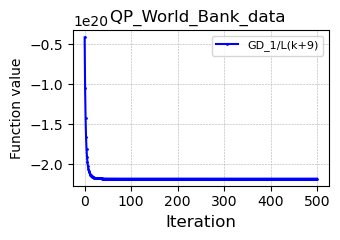

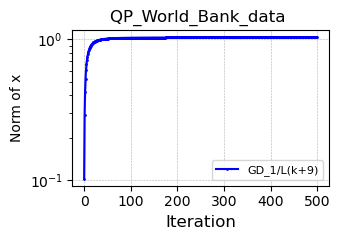

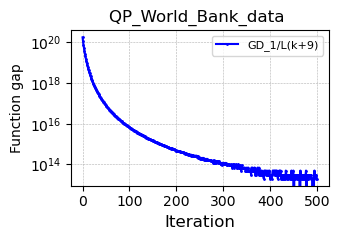

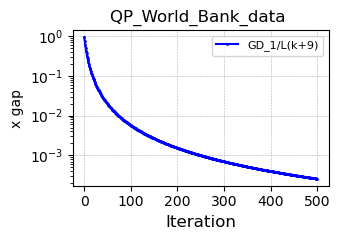

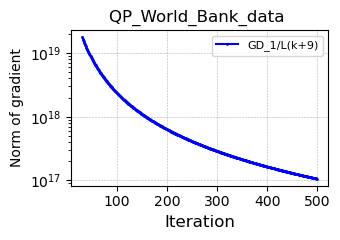

In [13]:
result = benchmark.run()
result.plot(
    metrics_to_plot= ['fs', 'xs_norm', 'f_gap', 'x_gap', 'grads_norm'],
    dir_path='plots',
    fname_append='qp_real',
    show=True,
    log=True 
)